# Detekcija anomalij v časovnih vrstah

Uvoz potrebnih knjižnic

In [112]:
import numpy as np
from darts import TimeSeries
from darts.ad import KMeansScorer
from darts.ad import QuantileDetector


### Ustvarimo časovno vrsto

<Axes: xlabel='time'>

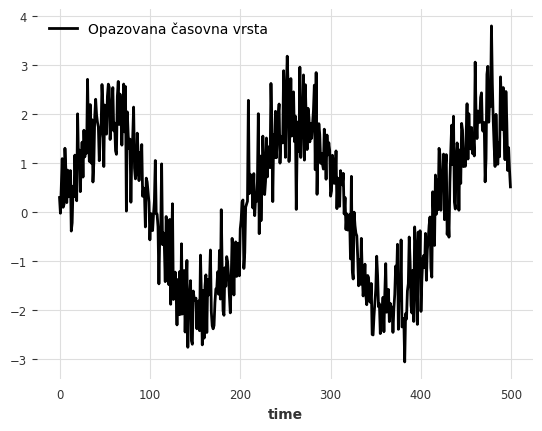

In [132]:
np.random.seed(42)
velikost = 500
podatki = 2*np.sin(np.arange(velikost) * 0.03) + np.random.randn(velikost) * 0.6
ts_normalna = TimeSeries.from_values(podatki)

# Vizualizacija
ts_normalna.plot(label="Opazovana časovna vrsta")

### Ustvarimo motnjo

<Axes: xlabel='time'>

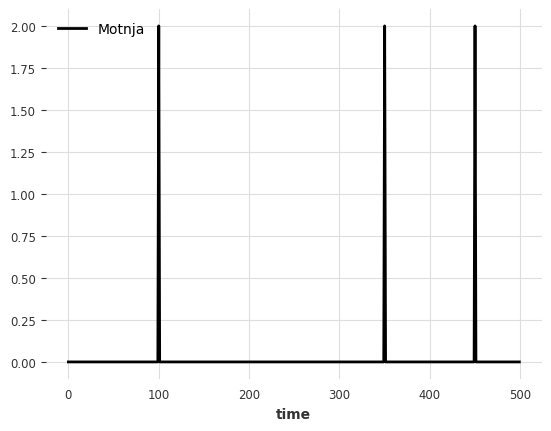

In [157]:
# Ustvarimo motnjo
indeks_anomalije_0 = 100
indeks_anomalije_1 = 350
indeks_anomalije_2 = 450

vrednost_motnje = 2.0 # Velik odmik od normale

motnja = np.zeros(velikost)
motnja[indeks_anomalije_0] = vrednost_motnje
motnja[indeks_anomalije_1] = vrednost_motnje
motnja[indeks_anomalije_2] = vrednost_motnje
ts_motnja = TimeSeries.from_values(motnja)
ts_motnja.plot(label="Motnja")

### Dodamo motnjo na opazovano časovno vrsto

<Axes: xlabel='time'>

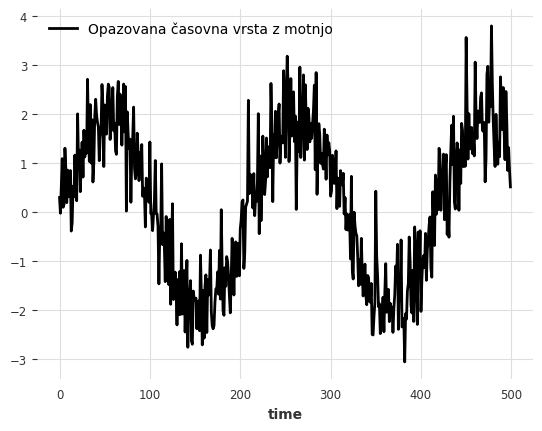

In [158]:
# Kopiramo normalno serijo in dodamo motnjo
podatki_z_motnjo = podatki.copy()
podatki_z_motnjo[indeks_anomalije_0] += vrednost_motnje
podatki_z_motnjo[indeks_anomalije_1] += vrednost_motnje
podatki_z_motnjo[indeks_anomalije_2] += vrednost_motnje

ts_z_motnjo = TimeSeries.from_values(podatki_z_motnjo)
ts_z_motnjo.plot(label="Opazovana časovna vrsta z motnjo")

<Axes: xlabel='time'>

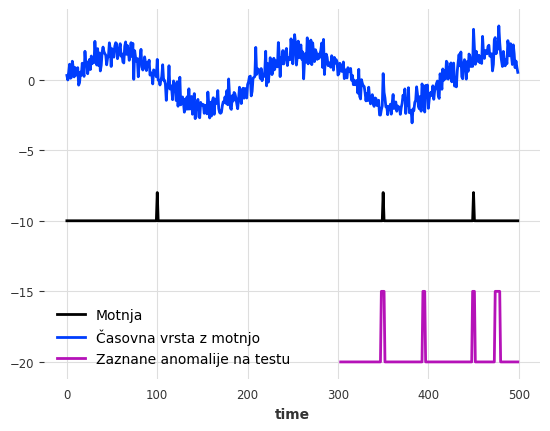

In [166]:
train, val = ts_z_motnjo.split_before(0.6)
scorer = KMeansScorer(k=5, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

# Izris opazovane časovne vrste in zaznanih anomalij
(ts_motnja - 10).plot(label="Motnja")
ts_z_motnjo.plot(label="Časovna vrsta z motnjo")
(binary_anom * 5 - 20).plot( label="Zaznane anomalije na testu")